<a href="https://colab.research.google.com/github/bhawanamehraa/CODSOFT/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [5]:

df=pd.read_csv(r"/content/fraudTrain.csv",nrows=100)

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:

df.shape

(100, 23)

In [8]:

df.shape

(100, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             100 non-null    int64  
 1   trans_date_trans_time  100 non-null    object 
 2   cc_num                 100 non-null    int64  
 3   merchant               100 non-null    object 
 4   category               100 non-null    object 
 5   amt                    100 non-null    float64
 6   first                  100 non-null    object 
 7   last                   100 non-null    object 
 8   gender                 100 non-null    object 
 9   street                 100 non-null    object 
 10  city                   100 non-null    object 
 11  state                  100 non-null    object 
 12  zip                    100 non-null    int64  
 13  lat                    100 non-null    float64
 14  long                   100 non-null    float64
 15  city_po

In [10]:

df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:

df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.0
mean,49.500000,4.091835e+17,81.771200,48708.810000,38.836017,-91.317743,5.800214e+04,1.325378e+09,38.850380,-91.414100,0.0
std,29.011492,1.301924e+18,74.416174,27989.616578,5.082487,15.421196,1.796775e+05,1.325509e+03,5.143402,15.388991,0.0
min,0.000000,6.049559e+10,1.820000,1545.000000,20.082700,-155.488000,4.600000e+01,1.325376e+09,19.560013,-156.045889,0.0
25%,24.750000,2.048580e+14,43.895000,23601.000000,36.308150,-99.112350,5.950000e+02,1.325377e+09,36.361620,-99.081835,0.0
50%,49.500000,3.506574e+15,62.805000,48893.500000,39.589850,-87.414150,2.265000e+03,1.325378e+09,39.508454,-88.314815,0.0
75%,74.250000,4.689607e+15,96.967500,72076.500000,42.177725,-79.754375,1.921175e+04,1.325379e+09,41.941140,-79.434998,0.0
max,99.000000,4.956829e+18,341.670000,99160.000000,48.887800,-69.965600,1.263321e+06,1.325381e+09,49.159047,-70.449359,0.0


In [ ]:
#calculate the age from dob
df['dob']= pd.to_datetime(df['dob'])
now=pd.to_datetime('now')
df['age']=(now-df['dob']).astype('<m8[Y]')

In [13]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [14]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

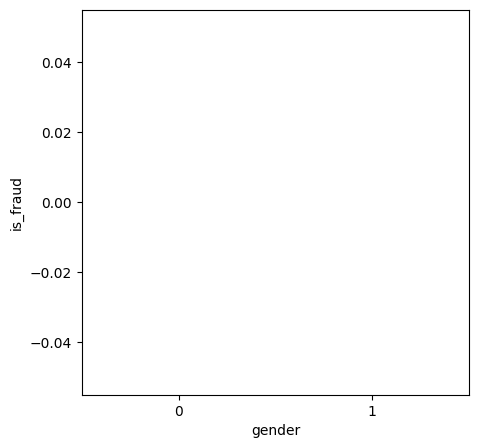

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='gender',y='is_fraud')
plt.show()

In [ ]:
sns.heatmap(df.corr())

In [18]:
df['is_fraud'].value_counts()

is_fraud
0    100
Name: count, dtype: int64

In [19]:

df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
x=df[['cc_num', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat','age']]
y=df['is_fraud']

KeyError: "['age'] not in index"

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             100 non-null    int64         
 1   trans_date_trans_time  100 non-null    object        
 2   cc_num                 100 non-null    int64         
 3   merchant               100 non-null    object        
 4   category               100 non-null    object        
 5   amt                    100 non-null    float64       
 6   first                  100 non-null    object        
 7   last                   100 non-null    object        
 8   gender                 100 non-null    int64         
 9   street                 100 non-null    object        
 10  city                   100 non-null    object        
 11  state                  100 non-null    object        
 12  zip                    100 non-null    int64         
 13  lat   

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
predict=lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

In [ ]:
#random forest classifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

In [ ]:
predict=rf.predict(x_test)
print(classification_report(y_test,predict))

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
predict=svc.predict(x_test)
print(classification_report(y_test,predict))